<img heigth="8" src="https://i.imgur.com/BhG5KQ3.png" alt="pbs-enae">

<h1 align="left"><i>Web scraping</i> para el análisis de la competencia empresarial</h1>
<h2 align="left"><i>Introduction to Web Scraping with BeautifulSoup</i></h2>

<p align="left">
  <h3><a href="https://joefaver.dev">Joseph F. Vergel-Becerra</a> | Aplicaciones de Python - Tools and Skill Courses</h3>
  <br>
  <b>Last updated:</b> <i>08/04/2023</i>
  <br><br>
  <a href="#referencias">Referencias</a> •
  <a href="#contribuir">Contribuir</a>
  <br><br>
</p>
<table align="left">
  <td>
      <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
        <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
      </a>
  </td>
  <td>
    <a href="https://colab.research.google.com/github/joefavergel/pbs-enae-python-applications-course/blob/main/3-introduction-to-web-scraping-with-beautifulsoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
      </a>
  </td>
  <td>
    <a href="https://github.com/joefavergel/pbs-enae-python-applications-course" target="_parent"><img src="https://img.shields.io/github/forks/joefavergel/pbs-enae-python-beginners-course?style=social" alt="Fork"/>
    </a>
  </td>
</table>
<br>
<br>

---

En este tutorial de *web scraping en Python*, aprenderemos cómo extraer información de una página de [IMDb](http://www.imdb.com) utilizando la biblioteca `BeautifulSoup`. El objetivo es raspar datos de películas, procesar el código HTML y transformarlo en datos tabulares para un análisis más detallado.

1. Instalación y configuración: Para comenzar, instale las bibliotecas necesarias, como '`BeautifulSoup`4', 'requests' y 'pandas', utilizando pip o conda.

2. Realizar una solicitud HTTP: Importe la biblioteca 'requests' y envíe una solicitud GET a la URL objetivo de IMDb. Asegúrese de que la solicitud sea exitosa y almacene el contenido en una variable.

3. Crear objeto `BeautifulSoup`: Importe '`BeautifulSoup`' de 'bs4' y cree un objeto con el contenido de la página, utilizando el analizador 'html.parser'.

4. Extracción de datos: Utilice selectores CSS y métodos de `BeautifulSoup`, como 'find' y 'find_all', para localizar y extraer información relevante, como el título, la fecha de lanzamiento, la calificación y otros detalles de las películas.

5. Creación de un DataFrame: Importe 'pandas' y cree un DataFrame vacío con las columnas deseadas. Itere sobre los elementos extraídos y almacene la información en el DataFrame.

6. Limpieza y preprocesamiento: Realice la limpieza de datos necesaria para eliminar caracteres no deseados y formatear adecuadamente los datos, como convertir las calificaciones en números decimales y las fechas en objetos datetime.

7. Análisis y exportación: Ahora que tiene un DataFrame limpio y bien estructurado, puede realizar análisis adicionales, visualizaciones o exportar los datos a un archivo CSV o Excel.

Siguiendo estos pasos, podrá raspar y procesar datos de IMDb utilizando `BeautifulSoup` en Python, y transformarlos en datos tabulares para análisis y uso en proyectos futuros.






### Primero visualicemos la [pagina](http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1) a *scrapear*.

In [1]:
from requests import get

url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url)
print(response.text[:500])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         

        <meta charset="utf-8">




        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
      


In [2]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [3]:
response.links

{}

In [4]:
from bs4 import BeautifulSoup


html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [5]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [6]:
first_movie = movie_containers[0]

In [7]:
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted">
<span class="certificate">15</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Drama, Sci-Fi            </span>


In [8]:
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

In [9]:
first_movie.a

<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a>

In [10]:
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>

In [11]:
first_movie.h3.a.text

'Logan'

In [12]:
first_name = first_movie.h3.a.text
first_name

'Logan'

In [13]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year.text

'(2017)'

In [14]:
first_year = first_year.text
first_year

'(2017)'

In [15]:
print(first_movie.prettify())

<div class="lister-item mode-advanced">
 <div class="lister-top-right">
  <div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342">
  </div>
 </div>
 <div class="lister-item-image float-left">
  <a href="/title/tt3315342/">
   <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
  </a>
 </div>
 <div class="lister-item-content">
  <h3 class="lister-item-header">
   <span class="lister-item-index unbold text-primary">
    1.
   </span>
   <a href="/title/tt3315342/">
    Logan
   </a>
   <span class="lister-item-year text-muted unbold">
    (2017)
   </span>
  </h3>
  <p class="text-muted">
   <span class="certificate">
    15
   </span>
   <span class="ghost">
    |
   </span>
   <span class="runtime">
    137 min
   </sp

In [16]:
first_imdb = float(first_movie.strong.text)
first_imdb

8.1

In [17]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

77


In [18]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="783161" name="nv">783,161</span>

In [19]:
first_votes['data-value']

'783161'

In [20]:
first_votes = int(first_votes['data-value'])

In [21]:
eighth_movie_mscore = movie_containers[7].find('div', class_ = 'ratings-metascore')
print(eighth_movie_mscore)

<div class="inline-block ratings-metascore">
<span class="metascore favorable">85        </span>
        Metascore
            </div>


In [22]:
import numpy as np


names = []
years = []
imdb_ratings = []
metascores = []
votes = []


for countainer in movie_containers:
    name = countainer.h3.a.text
    names.append(name)
    year = countainer.h3.find('span', class_ = 'lister-item-year text-muted unbold').text
    start_year = year.find('2')
    years.append(year[start_year:start_year+4])
    imdb_rating = float(first_movie.strong.text)
    imdb_ratings.append(imdb_rating)
    metascore = countainer.find('span', class_ = 'metascore favorable')
    if str(type(metascore)) == "<class 'NoneType'>":
        metascores.append(np.nan)
    else:
        metascores.append(int(metascore.text))
    vote = int(first_movie.find('span', attrs = {'name':'nv'})['data-value'])
    votes.append(vote)
    
    
print(names)
print(years)
print(imdb_ratings)
print(metascores)
print(votes)
    

['Logan', 'Thor: Ragnarok', 'Guardians of the Galaxy Vol. 2', 'Dunkerque', 'Spider-Man: De regreso a casa', 'Mujer Maravilla', 'Star Wars: Los últimos jedi', 'Huye', 'Blade Runner 2049', 'It', 'Baby, el aprendiz del crimen', 'Coco', 'Tres anúncios por un crimen', 'La casa de papel', 'John Wick: Chapter 2', 'Liga de Justicia', 'La forma del agua', 'Dark', 'Jumanji en la selva', 'Kingsman: El círculo dorado', 'Kong: Skull Island', 'Ozark', 'Piratas del Caribe: La venganza de Salazar', 'La bella y la bestia', 'Mindhunter', 'Lady Bird', '13 Reasons Why', 'El gran showman', 'Alien: Covenant', 'Llámame por tu nombre', 'Asesinato en el Expreso de Oriente', 'La guerra del planeta de los simios', 'Muerte misteriosa', 'The Punisher', "The Handmaid's Tale", 'Rápidos y furiosos 8', 'Life', 'Duro de cuidar', '¡madre!', 'Yo, Tonya', 'El Rey Arturo: La Leyenda de la Espada', 'Ghost in the Shell', 'Big Little Lies', 'Las horas más oscuras', 'The End of the F***ing World', 'Atómica', 'La momia', 'Brigh

In [23]:
print(len(names),len(years),len(imdb_ratings),len(metascores),len(votes))

50 50 50 50 50


In [24]:
import pandas as pd
df = pd.DataFrame({'name':names, 'year':years, 'imdb_rating':imdb_ratings, 'metascore':metascores, 'vote':votes})

In [25]:
df

,name,year,imdb_rating,metascore,vote
0,Logan,2017,8.1,77.0,783161
1,Thor: Ragnarok,2017,8.1,74.0,783161
2,Guardians of the Galaxy Vol. 2,2017,8.1,67.0,783161
3,Dunkerque,2017,8.1,94.0,783161
4,Spider-Man: De regreso a casa,2017,8.1,73.0,783161
5,Mujer Maravilla,2017,8.1,76.0,783161
6,Star Wars: Los últimos jedi,2017,8.1,84.0,783161
7,Huye,2017,8.1,85.0,783161
8,Blade Runner 2049,2017,8.1,81.0,783161
9,It,2017,8.1,69.0,783161


In [26]:
df.dtypes

name            object
year            object
imdb_rating    float64
metascore      float64
vote             int64
dtype: object

<AxesSubplot:xlabel='name'>

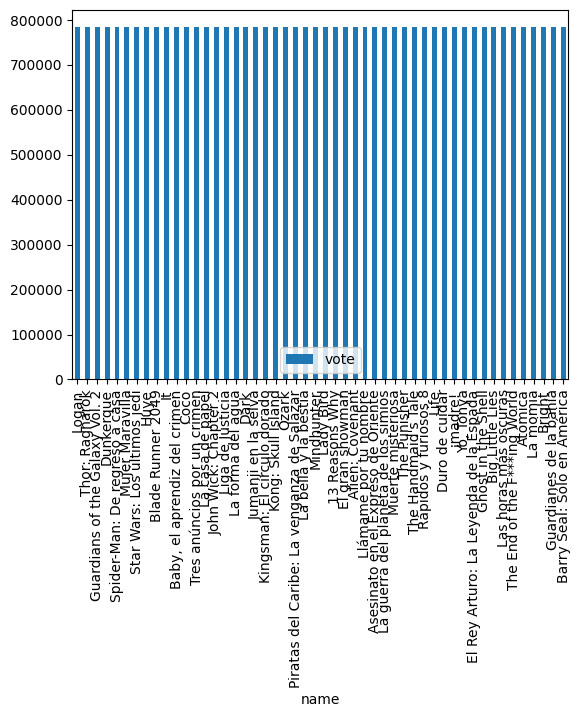

In [27]:
import matplotlib as plt
df.plot.bar(x='name',y='vote')